In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('spam.csv', encoding='latin-1')

In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3915,ham,Ok. C u then.,NaN,NaN,NaN
3732,ham,Old Orchard near univ. How about you?,NaN,NaN,NaN
1877,ham,This pen thing is beyond a joke. Wont a Biro d...,NaN,NaN,NaN
5397,ham,That's necessarily respectful,NaN,NaN,NaN
5216,ham,I am late. I will be there at,NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:
#1) Data cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model Building
# 5. Evaluation
# 6. Improvement
# 7. Website
# 8. Deployment


## 1.Data Cleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
# drop last 3 columns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [8]:
df.sample(5)

,v1,v2
2226,ham,If you have belive me. Come to my home.
4418,ham,How have your little darlings been so far this...
4522,ham,Actually I decided I was too hungry so I haven...
581,ham,Ok anyway no need to change with what you said
3456,ham,Friendship poem: Dear O Dear U R Not Near But ...


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [10]:
# Renaming the columns
df.rename(columns={'v1': 'target', 'v2':'text'},inplace=True)
df.sample(5)

,target,text
1825,ham,Wat makes some people dearer is not just de ha...
5511,ham,"ItÛ÷s reassuring, in this crazy world."
4201,ham,Are you happy baby ? Are you alright ? Did you...
760,spam,"Romantic Paris. 2 nights, 2 flights from å£79 ..."
3329,ham,Send me yetty's number pls.


In [11]:
!pip install scikit-learn

In [12]:
from sklearn.preprocessing import LabelEncoder
obj = LabelEncoder()

In [13]:
df['target'] = obj.fit_transform(df['target'])

In [14]:
#transforming the target value ham = 0, spam = 1

In [15]:
#df['target'] = obj.fit_transform(df['target'])

In [16]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [17]:
#check for  Missing value
df.isnull().sum()

target    0
text      0
dtype: int64

In [18]:
# check for Duplicate value
df.duplicated().sum()

np.int64(403)

In [19]:
# remove duplicate
df = df.drop_duplicates(keep='first')

In [20]:
df.duplicated().sum()

np.int64(0)

In [21]:
df.shape

(5169, 2)

## 2.EDA

In [22]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [23]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

In [24]:
import matplotlib.pyplot as plt

([<matplotlib.patches.Wedge at 0x2227d9373e0>,
 [Text(-1.014499732282844, 0.4251944181172162, 'ham'),
  Text(1.0144998708287172, -0.42519408755122207, 'spam')],
 [Text(-0.5533634903360967, 0.2319242280639361, '87.37'),
  Text(0.553363565906573, -0.231924047755212, '12.63')])

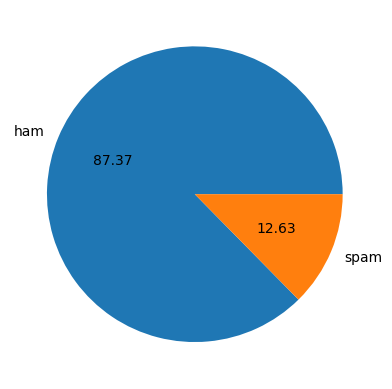

In [25]:
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%.2f")

In [26]:
# Data is imbalanced

In [27]:
# now we will check in our sms how many characters,words and sentences are used so we will do deeper analysis for that we will create 3 columns:-
# no. of characters in the sms 2) no. of words 3) no. of sentences in the sms. we needed a nltk(natural language toolkit)library to do this

In [28]:
pip install nltk --upgrade --no-cache-dir

Note: you may need to restart the kernel to use updated packages.


In [29]:
#number of characters 
df['num_characters']=df['text'].apply(len)

In [30]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [31]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dhruv\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\dhruv\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [32]:
# Number of words
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [33]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [34]:
# number of sentences
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [35]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [36]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [37]:
# Described function output for ham =0 messages
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [38]:
# describe function output for spam = 1 messages
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [39]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

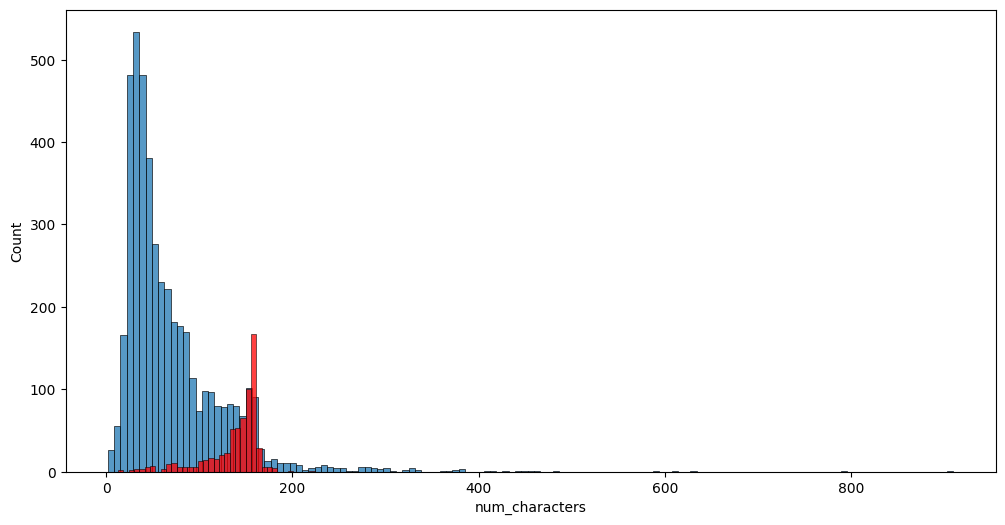

In [40]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color ='red')

In [41]:
# in this above histogram msg it shows that most of the ham messages are made up of less no of characters and most of the spam msg's are made up of high no of messages

<Axes: xlabel='num_words', ylabel='Count'>

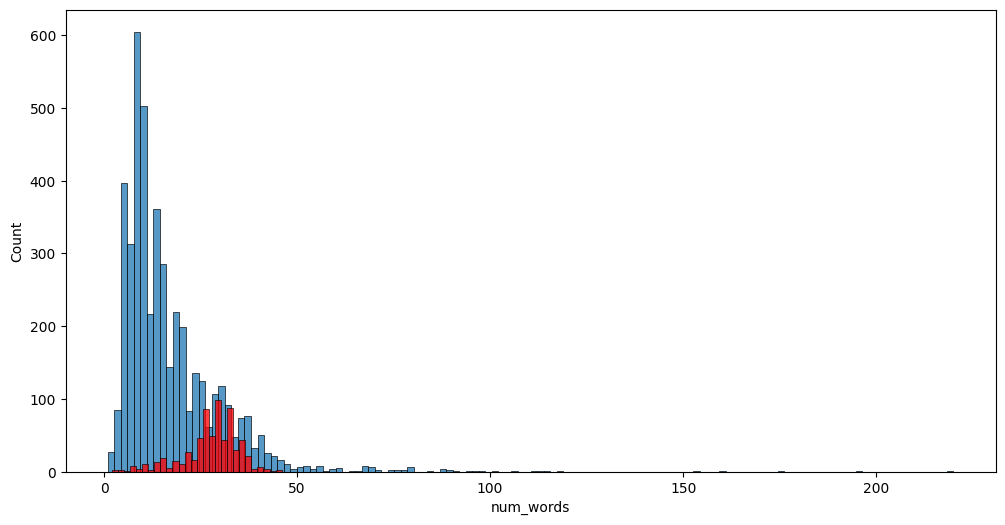

In [42]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color ='red')

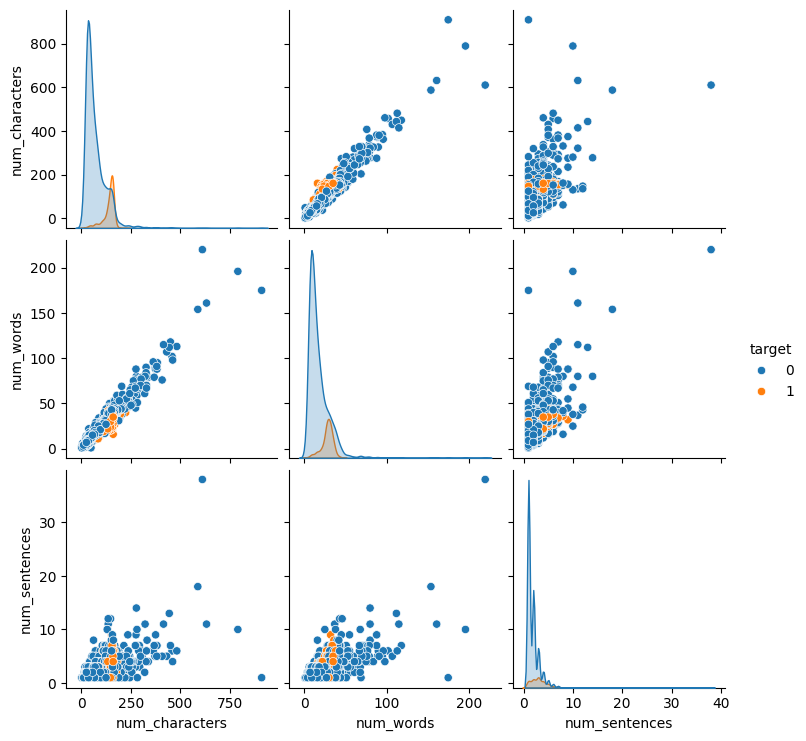

In [43]:
sns.pairplot(df,hue = 'target')

In [44]:
# checking the corelation between each other columns
correlation = df[['target','num_characters','num_words','num_sentences']].corr()


<Axes: >

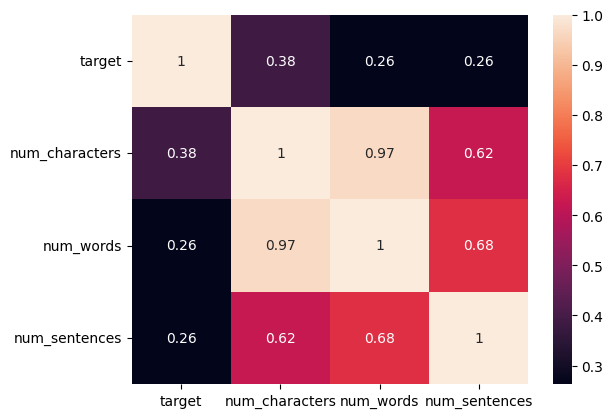

In [45]:
sns.heatmap(correlation,annot = True)

# 3. Data Preprocessing
 ### . Lower case
 ### . Tokenization
 ### . Removing Special charcters
 ### . Removing Stop Words and Punctunation
 ### . Stemming - dancing ,dance danced = dance


In [57]:
# 3. 1,2,3 done
# for lowercase , tokenization, removing special characters
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    # for stopwords and punctuation
    text = y[:]
    y.clear()
    for i in text :
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
#  for stemming
    text = y[:]
    y.clear()
    for i in text :
        y.append(ps.stem(i))
    
    return " ".join(y)

In [62]:
# succesfully removed special characters and stemming 
transform_text('Okay name ur price as long as its legal! Wen can I pick them up? Y u ave x ams xx')

'okay name ur price long legal wen pick u ave x am xx'

In [63]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dhruv\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [64]:
#punctuation marks
import string
#string.punctuation


In [65]:
df['text'][100]

'Okay name ur price as long as its legal! Wen can I pick them up? Y u ave x ams xx'

In [66]:
# stemming
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [67]:
# creating new column transform text for which we have created the function 
df['transformed_text']= df['text'].apply(transform_text)

In [68]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [69]:
!pip install wordcloud

In [70]:
# word cloud - use to extract the most common word from the data
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [71]:
# most common spam messages word from transformed_text column 
spam_wc=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))        

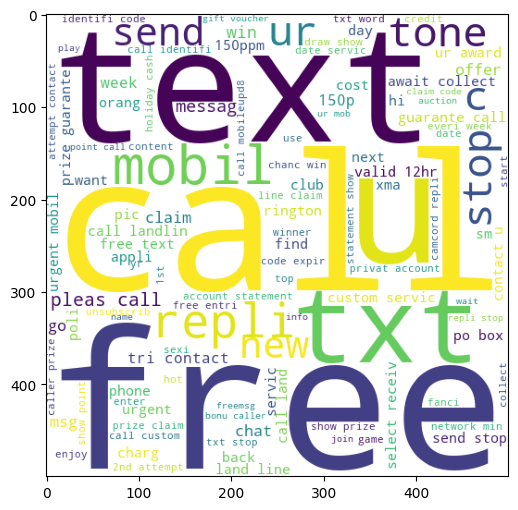

In [72]:
plt.figure(figsize=(12,6))
plt.imshow(spam_wc)

In [73]:
# Most common ham messages words from transformed_text column
ham_wc=wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

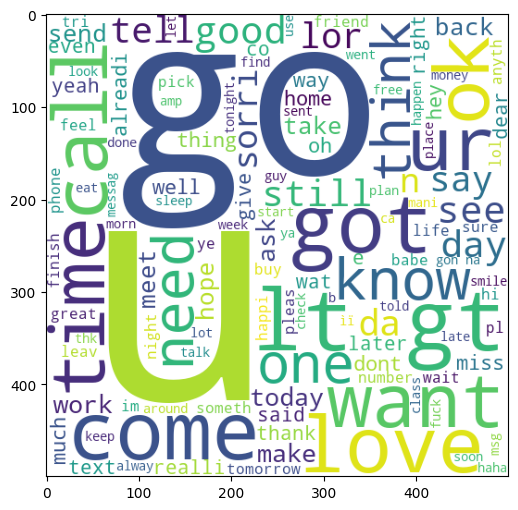

In [74]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [75]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [76]:
# to know the common words spam
spam_corpus=[]
for msg in df[df['target']==1]['transformed_text'].tolist():
    #print(msg)
    for word in msg.split():
        spam_corpus.append(word)

In [77]:
len(spam_corpus)

9939

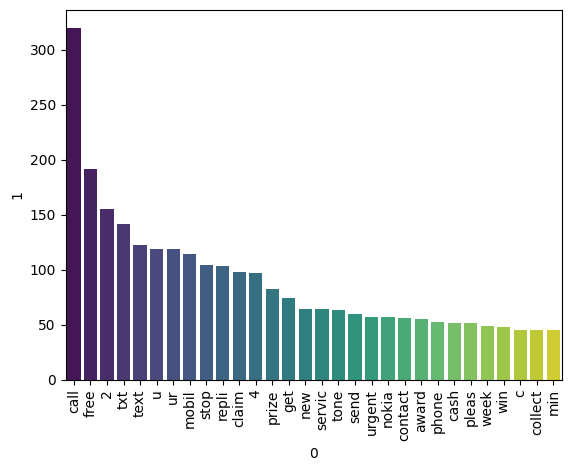

In [78]:
from collections import Counter

# Get word frequencies
word_freq = Counter(spam_corpus).most_common(30)

# Convert to DataFrame
df1 = pd.DataFrame(word_freq)
# Plot
sns.barplot(x=0, y=1, data=df1,palette="viridis",hue=0)
plt.xticks(rotation='vertical')
plt.show()


In [79]:
#for ham now

In [80]:
ham_corpus=[]
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    #print(msg)
    for word in msg.split():
        ham_corpus.append(word)

In [81]:
len(ham_corpus)

35404

In [82]:
df.columns
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


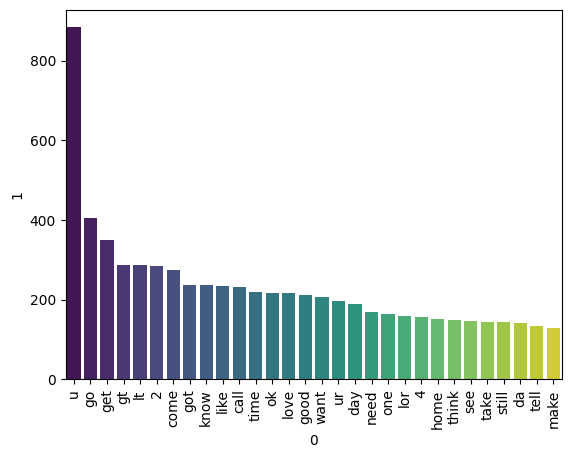

In [83]:
from collections import Counter

# Get word frequencies
word_freq1 = Counter(ham_corpus).most_common(30)

# Convert to DataFrame
df2 = pd.DataFrame(word_freq1)

# Plot
sns.barplot(x=0, y=1, data=df2,palette="viridis",hue=0)
plt.xticks(rotation='vertical')
plt.show()

In [84]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


# 4. Model Building

In [85]:
# naive based algo
#we have to covert text into numbers or vectors

In [183]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [184]:
X = tfidf.fit_transform(df['transformed_text']).toarray() #converting sparse array to dense array,vertorize

In [185]:
X.shape

(5169, 3000)

In [186]:
y = df['target'].values

In [187]:
y.shape

(5169,)

In [188]:
from sklearn.model_selection import train_test_split

In [189]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.2,random_state=2)

In [190]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [191]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [192]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.874274661508704
[[790 106]
 [ 24 114]]
0.5181818181818182


In [193]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [194]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [155]:
!pip install xgboost

In [156]:

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,precision_score

In [157]:
svc = SVC(kernel='sigmoid',gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear',penalty='l1')
rfc = RandomForestClassifier(n_estimators=50,random_state=2)
abc = AdaBoostClassifier(n_estimators=50,random_state=2)
bc = BaggingClassifier(n_estimators=50,random_state=2)
etc = ExtraTreesClassifier(n_estimators=50,random_state=2)
gbdt=GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb= XGBClassifier(n_estimators=50,random_state=2)

In [158]:
clfs = {
    'SVC' :svc,
    'KN' : knc,
    'NB' : mnb,
    'DT' : dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost' : abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT': gbdt,
    'xgb':xgb
}

In [159]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_predict = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_predict)
    precision = precision_score(y_test,y_predict)
    return accuracy,precision

In [160]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9758220502901354, 0.9747899159663865)

In [161]:
accuracy_scores = []
precision_scores = []
for name, clf in clfs.items():
    current_accuracy,current_precision= train_classifier(clf,X_train,y_train,X_test,y_test)

    print("for ",name)
    print("Accuracy-",current_accuracy)
    print("precision-",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

for  SVC
Accuracy- 0.9758220502901354
precision- 0.9747899159663865
for  KN
Accuracy- 0.9052224371373307
precision- 1.0
for  NB
Accuracy- 0.9709864603481625
precision- 1.0
for  DT
Accuracy- 0.9323017408123792
precision- 0.8333333333333334
for  LR
Accuracy- 0.9555125725338491
precision- 0.96
for  RF
Accuracy- 0.9738878143133463
precision- 0.9826086956521739
for  AdaBoost
Accuracy- 0.9216634429400387
precision- 0.8202247191011236
for  BgC
Accuracy- 0.9584139264990329
precision- 0.8682170542635659
for  ETC
Accuracy- 0.9748549323017408
precision- 0.9745762711864406
for  GBDT
Accuracy- 0.9506769825918762
precision- 0.9306930693069307
for  xgb
Accuracy- 0.9680851063829787
precision- 0.9487179487179487


In [162]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [163]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.973888,0.982609
0,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576
4,LR,0.955513,0.960000
10,xgb,0.968085,0.948718
9,GBDT,0.950677,0.930693
7,BgC,0.958414,0.868217
3,DT,0.932302,0.833333


In [164]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [165]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.905222
1,NB,Accuracy,0.970986
2,RF,Accuracy,0.973888
3,SVC,Accuracy,0.975822
4,ETC,Accuracy,0.974855
5,LR,Accuracy,0.955513
6,xgb,Accuracy,0.968085
7,GBDT,Accuracy,0.950677
8,BgC,Accuracy,0.958414
9,DT,Accuracy,0.932302


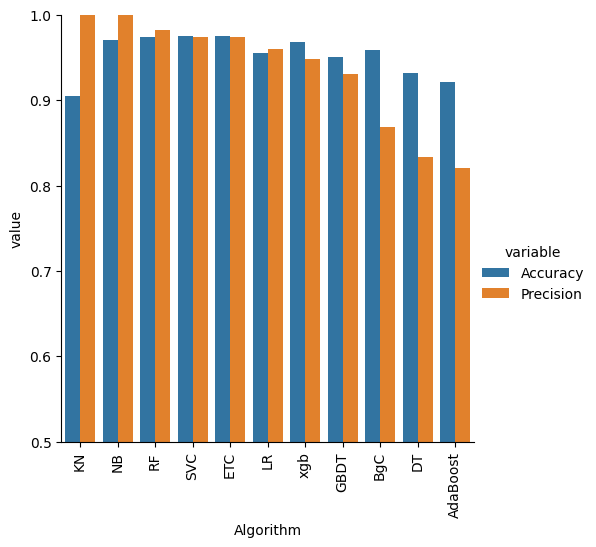

In [166]:
sns.catplot(x = 'Algorithm',y='value', hue= 'variable',data= performance_df1,kind = 'bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation="vertical")
plt.show()
    

In [167]:
# Improving model 
# 1. Change the max_features parameters of TfIdf

In [173]:
temp_df = pd.DataFrame({
    'Algorithm':clfs.keys(),
    'Accuracy_max_ft_3000':accuracy_scores,
    'Precision_max_ft_3000':precision_scores})

In [174]:
performance_df.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000
0,KN,0.905222,1.000000,0.905222,1.000000
1,NB,0.970986,1.000000,0.970986,1.000000
2,RF,0.973888,0.982609,0.973888,0.982609
3,SVC,0.975822,0.974790,0.975822,0.974790
4,ETC,0.974855,0.974576,0.974855,0.974576
5,LR,0.955513,0.960000,0.955513,0.960000
6,xgb,0.968085,0.948718,0.968085,0.948718
7,GBDT,0.950677,0.930693,0.950677,0.930693
8,BgC,0.958414,0.868217,0.958414,0.868217
9,DT,0.932302,0.833333,0.932302,0.833333


In [195]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))